In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
# dataset from: https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star
df = pd.read_csv('data/pulsar_stars.csv')

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.shape

(17898, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
# no NaN data
df.isnull().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

In [8]:
# heavily skewed toward negative class
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [9]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1,-0.521435,-0.539793,0.00686873,-0.0476316,0.0294294,0.0276915,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1,0.945729,0.414368,0.43288,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1,0.412056,0.41514,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.00686873,0.414368,0.412056,1,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.0476316,0.43288,0.41514,0.796555,1,-0.809786,-0.5758,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.0294294,-0.341209,-0.328843,-0.615971,-0.809786,1,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.0276915,-0.214491,-0.204782,-0.354269,-0.5758,0.923743,1,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1


In [10]:
#disconcerting that multiple factors weigh heavily on target class
corr['target_class'].sort_values(ascending=False)

target_class                                     1.000000
 Excess kurtosis of the integrated profile       0.791591
 Skewness of the integrated profile              0.709528
 Standard deviation of the DM-SNR curve          0.491535
 Mean of the DM-SNR curve                        0.400876
 Skewness of the DM-SNR curve                   -0.259117
 Standard deviation of the integrated profile   -0.363708
 Excess kurtosis of the DM-SNR curve            -0.390816
 Mean of the integrated profile                 -0.673181
Name: target_class, dtype: float64

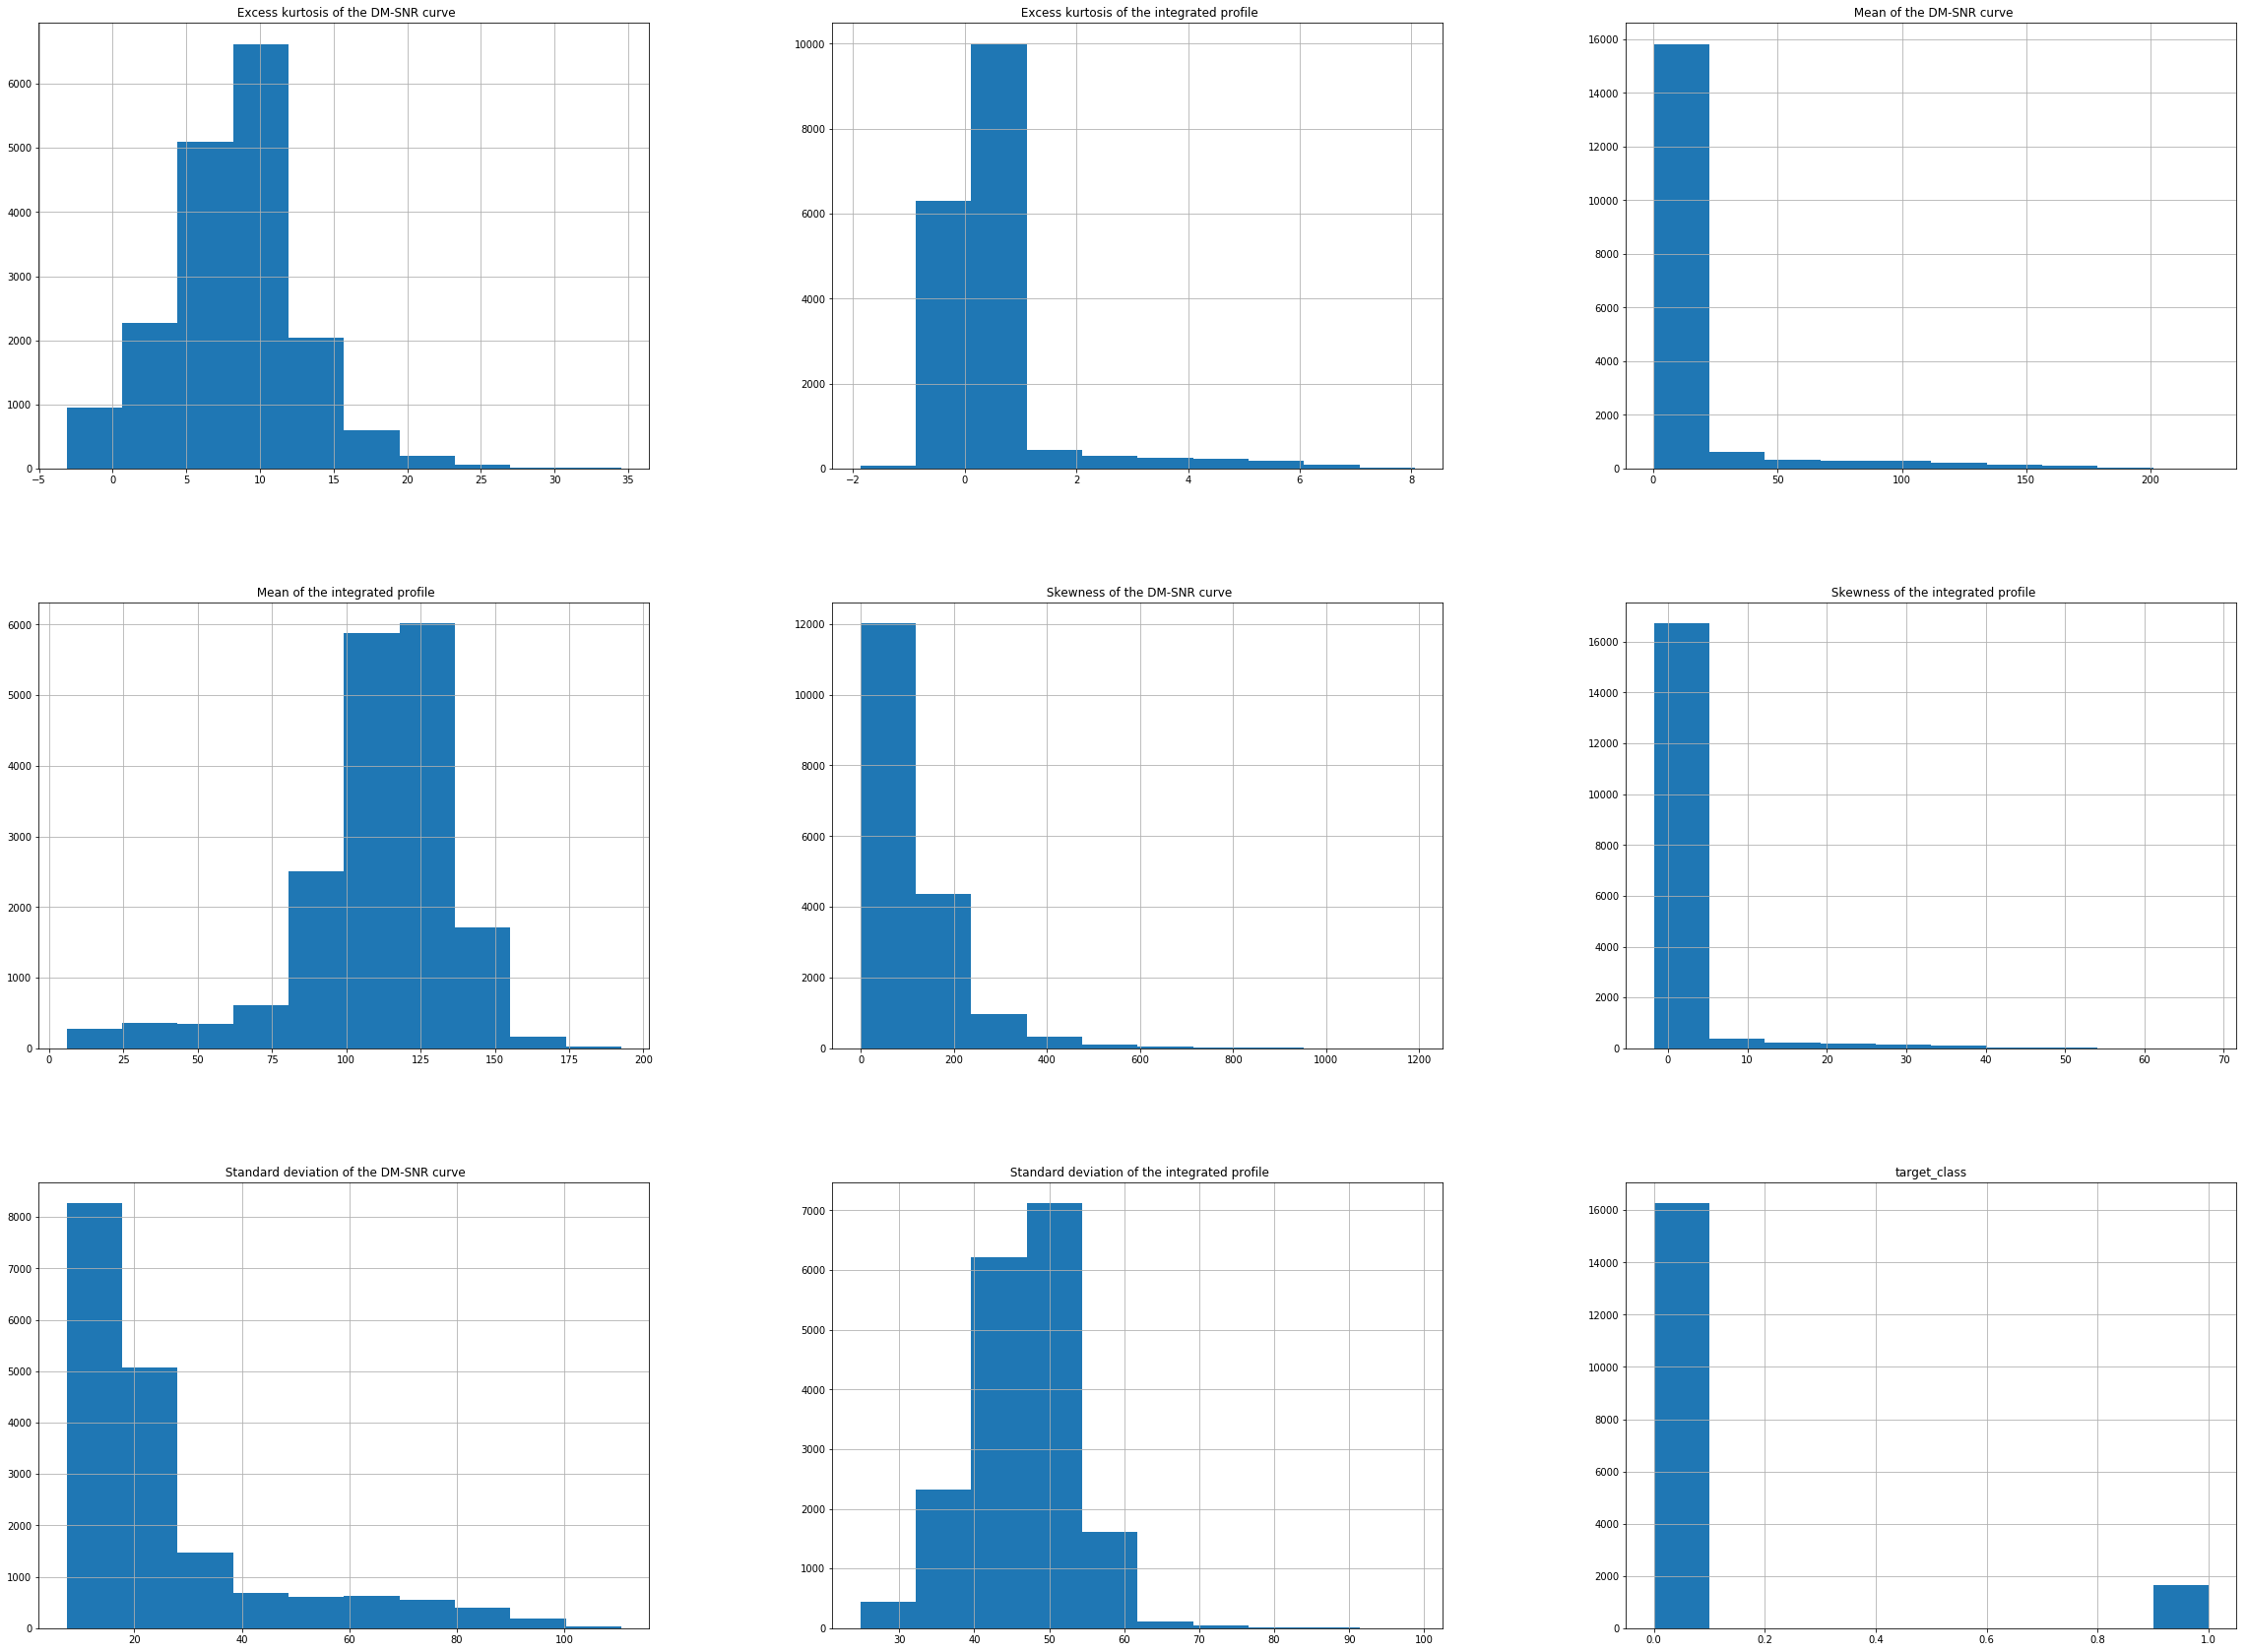

In [11]:
df.hist(figsize=(40,30))
plt.show()

In [12]:
#PROBLEM WITH PROPORTIONING DATASET


# startified split to make test set labeled evenly
# maintains proportionality of dataset
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_index, test_index in split.split(df, df['target_class']):
#     train_set = df.loc[train_index]
#     test_set = df.loc[test_index]

# train_set['target_class'].value_counts()

# #split into train 1s and 0s
# pos_train = train_set.loc[train_set['target_class'] == 1]
# neg_train = train_set.loc[train_set['target_class'] == 0]
# pos_test = test_set.loc[test_set['target_class'] == 1]
# neg_test = test_set.loc[test_set['target_class'] == 0]


In [13]:

#split into train 1s and 0s
pos = df.loc[df['target_class'] == 1]
neg = df.loc[df['target_class'] == 0]

threeXpos = round(pos.shape[0]*2.5)
# if I wanted to take a random batch of the negative class
# neg_batch_seed = np.random.randint(0, (neg.shape[0] - threeXpos))

#3 to l neg. to pos.
proportioned_neg = neg[0:threeXpos]
#train
neg_test = neg[threeXpos:]
print(neg_test.shape)

pos = pos.append(proportioned_neg)

pos['target_class'].value_counts()


(12161, 9)


0    4098
1    1639
Name: target_class, dtype: int64

In [14]:
# convert df into an array
array = pos.values
print(type(array))
print(array.shape)
array[0]

<class 'numpy.ndarray'>
(5737, 9)


array([99.3671875 , 41.57220208,  1.54719697,  4.15410604, 27.55518395,
       61.71901588,  2.20880796,  3.66268014,  1.        ])

In [15]:
# will append to testing set
neg_test = neg_test.values
neg_testX = neg_test[:, :8]
neg_testY = neg_test[:, 8]

In [16]:
#normalize input values between 0 and 1
def normalize(array):
    for column in range(array.shape[1]):
        array[:,column] = (array[:,column] - np.min(array[:,column])) / (np.max(array[:,column]) - np.min(array[:,column]))
    return array                                
                                                               

In [17]:
X_s = array[:, :8] # X values... already column vectors
X_s = normalize(X_s)

print(X_s.shape)
y_s = array[:, 8] # labels
y_s.astype(int) # convert to integers

print(y_s.shape)
print('_________')

# shuffle - then split into train and test sets
rnd_inds = np.arange(len(X_s)) #array xs long
np.random.shuffle(rnd_inds) # xs shuffled

# reorder xs and corresponding ys
X_s = X_s[rnd_inds,:] 
y_s = y_s[rnd_inds] 


#STRATIFIED SAMPLING, GET EQUAL AMT OF ONES AND ZEROS... SKLEARN



# 85% of dataset put into training set
train_len = int(np.round(X_s.shape[0]*.85))
print(train_len)

#assign training and test set
X_train = X_s[:train_len] # everything before train_len
y_train = y_s[:train_len]

X_test = X_s[train_len:] # everything after train_len 
X_test = np.append(X_test, neg_testX, axis= 0) # append unused X neg class data

y_test = y_s[train_len:]
y_test = np.append(y_test, neg_testY, axis= 0) # append unused X neg class data





print(X_train.shape)
print('_________')


# take validation set from training data
# valid used to check quality of test set  
valid_len = int(np.round(X_s.shape[0]*.1))
print(valid_len)


X_valid, X_train = X_train[:valid_len], X_train[valid_len:]
y_valid, y_train = y_train[:valid_len], y_train[valid_len:]
print(X_train.shape)
print(y_train.shape)
print('_________')
print(X_test.shape)
print(y_test.shape)

(5737, 8)
(5737,)
_________
4876
(4876, 8)
_________
574
(4302, 8)
(4302,)
_________
(13022, 8)
(13022,)


In [18]:
import tensorflow as tf

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [19]:
reset_graph()
num_epochs = int(5e5) # num training loops
batch_size = 1 # NOTE: ONLY SEEMS TO WORK W/ BATCH SIZE 1

n_inputs = 8
n_outputs = 2 # binary classifier
num_nodes_l1 = 100 # 100 doesn't matter
num_nodes_l2 = 100

In [20]:
xs = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") #input values ––> specifying params of fed dict. 
ys = tf.placeholder(tf.int64, shape=(None), name="y") #labels


In [21]:
# design network
hidden1 = tf.layers.dense(xs, num_nodes_l1, name="hidden1",
                              activation=tf.nn.relu) #first layer connected to input layer (placeholder)
hidden2 = tf.layers.dense(hidden1, num_nodes_l2, name="hidden2",
                              activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

#Computes sparse softmax cross entropy between logits and labels.
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=ys, logits=logits)

loss = tf.reduce_mean(xentropy, name="loss")

    

In [22]:
learning_rate = 1e-3

# cost = tf.reduce_mean(tf.square(outputs-ys)) # mse ... tf.losses.mean_squared_error(labels, predictions)
optimizer = tf.train.AdamOptimizer( learning_rate )

training_op = optimizer.minimize(loss) # optimize (reduce) mse



In [23]:
# Says whether the targets are in the top K predictions.
correct = tf.nn.in_top_k(logits, ys, 1)

accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


In [ ]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # get starting accuracy val. 
    last_accuracy = accuracy.eval(feed_dict={xs: X_valid, ys: y_valid})
    
    for i in range(num_epochs):    
        # select random subsets of data to train on (aka batches)
        rnd_idx = np.random.permutation(len(X_train))[:batch_size]
        X_batch = X_train[rnd_idx]
        y_batch = y_train[rnd_idx]
        # print out progress
        if not(i%(10000)):
    
            # print epoch + accuracy val
            print('epoch: ', i)
            accuracy_val = accuracy.eval(feed_dict={xs: X_valid, ys: y_valid})
            print(accuracy_val)
            
            
#             print(y_valid[:10])
#             logits_val = logits.eval(feed_dict={xs: X_valid, ys: y_valid})
#             print(logits_val[:10])
            
            
#             correct_val = correct.eval(feed_dict={xs: X_valid, ys: y_valid})
#             print(correct_val)

            
            
#             implement early stopping
#             if (last_accuracy <= accuracy_val):
#                 last_accuracy = accuracy_val 
#                 save_path = saver.save(sess, "./my_model.ckpt")
#                 print("Model saved in path: %s" % save_path)
#             else:
#                 break

            # save best model
            if (accuracy_val > last_accuracy):
                last_accuracy = accuracy_val 
                save_path = saver.save(sess, "./my_model.ckpt")
                print("Model saved in path: %s" % save_path)
            
        sess.run(training_op, feed_dict={xs: X_batch, ys: y_batch}) #feed batch to optimizer
    

epoch:  0
0.72473866
epoch:  10000
0.9529617
Model saved in path: ./my_model.ckpt
epoch:  20000
0.9599303
Model saved in path: ./my_model.ckpt
epoch:  30000
0.956446
epoch:  40000
0.9581882
epoch:  50000
0.9529617
epoch:  60000
0.9616725
Model saved in path: ./my_model.ckpt
epoch:  70000
0.9616725
epoch:  80000
0.9477352
epoch:  90000
0.9616725
epoch:  100000
0.956446
epoch:  110000
0.9581882
epoch:  120000
0.9581882
epoch:  130000
0.9634146
Model saved in path: ./my_model.ckpt
epoch:  140000
0.9581882
epoch:  150000
0.9599303
epoch:  160000
0.9599303
epoch:  170000
0.9529617
epoch:  180000
0.9651568
Model saved in path: ./my_model.ckpt
epoch:  190000
0.9547038
epoch:  200000
0.956446
epoch:  210000
0.9634146
epoch:  220000
0.9581882
epoch:  230000
0.956446
epoch:  240000
0.9529617
epoch:  250000
0.9581882
epoch:  260000
0.9616725
epoch:  270000
0.956446
epoch:  280000
0.9581882
epoch:  290000
0.9599303
epoch:  300000
0.956446
epoch:  310000
0.9581882
epoch:  320000
0.956446
epoch:  33

In [ ]:
with tf.Session() as sess:
    #restore model from early stopping
    saver.restore(sess, "./my_model.ckpt")
    # generate predicted output values for y, test
    pred_ys = sess.run(logits, feed_dict={xs:X_test})


In [ ]:
print(y_test[:10])
pred_ys[:10]

In [ ]:
# precision // recall scores // F1 score

from sklearn.metrics import precision_score, recall_score, f1_score

# get class prediction of each instance 
preds = []
for i in range(len(pred_ys)):
    preds.append(np.argmax(pred_ys[i], axis = 0))

print(precision_score(y_test, preds))
# 97.7% precise. Few False Positives

print(recall_score(y_test, preds))
# 93.6% accurate. Not a lot of False Negatives.

print(f1_score(y_test, preds))
# 95.6% f1 score

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, preds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)